In [1]:
#importing library
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from nltk.stem.porter import *
from nltk.corpus import stopwords

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data.head()

,review_id,Review Text,Review Title,topic
0,0,"Did nothing for me, didn't help lost even with...",Useless,Shipment and delivery
1,1,"Did nothing for me, didn't help lost even with...",Useless,Not Effective
2,2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,Customer Service
3,3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic
4,4,These don't compare to the name brand wipes. F...,Can't tackle big messes,Texture


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5959 entries, 0 to 5958
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     5959 non-null   int64 
 1   Review Text   5959 non-null   object
 2   Review Title  5959 non-null   object
 3   topic         5959 non-null   object
dtypes: int64(1), object(3)
memory usage: 186.3+ KB


In [7]:
sample_count = data["topic"].value_counts() 

In [8]:
sample_count

Bad Taste/Flavor           1194
Quality/Contaminated        715
Not Effective               611
Allergic                    567
Packaging                   467
Texture                     410
Shipment and delivery       390
Customer Service            239
Color and texture           234
Too big to swallow          228
Ingredients                 216
Expiry                      136
Smells Bad                  123
Pricing                     107
Wrong Product received       99
Too Sweet                    97
Inferior to competitors      44
False Advertisement          37
Didn't Like                  31
Customer Issues               8
Hard to Chew                  6
Name: topic, dtype: int64

In [9]:
newData = pd.DataFrame(data = None, columns= ["Review Text", "topic"])
newData["Review Text"] =  data["Review Title"] + " " + data["Review Text"] 
newData["topic"] =  data["topic"]

In [10]:
newData.head()

,Review Text,topic
0,"Useless Did nothing for me, didn't help lost e...",Shipment and delivery
1,"Useless Did nothing for me, didn't help lost e...",Not Effective
2,TRASH!!! Do not buy these bags it’s a waist of...,Customer Service
3,Do not recommend Gave me an allergic reaction ...,Allergic
4,Can't tackle big messes These don't compare to...,Texture


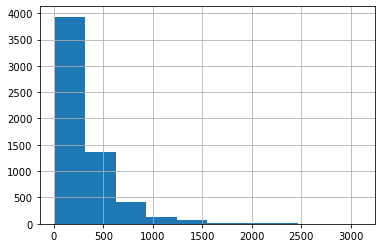

In [11]:
newData['Review Text'].str.len().hist()

In [12]:
# basic preprocessing of data
def preprocessing(data_input):
    data_input = data_input.apply(lambda x: x.lower())
    data_input = data_input.apply(lambda x: re.sub("'"           , '', x))
    data_input = data_input.apply(lambda x: re.sub("[^\w\s]"     , '', x))
    data_input = data_input.apply(lambda x: re.sub("[0-9]"       , '', x))
    data_input = data_input.apply(lambda x: x.strip())
    return data_input   

In [13]:
newData["Review Text"] = preprocessing(newData["Review Text"])

In [14]:
newData.head()

,Review Text,topic
0,useless did nothing for me didnt help lost eve...,Shipment and delivery
1,useless did nothing for me didnt help lost eve...,Not Effective
2,trash do not buy these bags its a waist of tim...,Customer Service
3,do not recommend gave me an allergic reaction ...,Allergic
4,cant tackle big messes these dont compare to t...,Texture


In [15]:
import requests
from nltk import FreqDist

# load the ebook
url = "https://www.gutenberg.org/files/16/16-0.txt"
peter_pan = requests.get(url, verify=False)

# break the book into different words using the split() method
peter_pan_words = peter_pan.text.split()

# build frequency distribution using NLTK's FreqDist() function
word_frequency = FreqDist(peter_pan_words)

# extract the frequency of third most frequent word
freq = word_frequency.most_common(3)[2][1]

# print the third most frequent word - don't change the following code, it is used to evaluate the code
print(freq)

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.gutenberg.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


1214


In [16]:
word_frequency

FreqDist({'the': 2331, 'and': 1396, 'to': 1214, 'a': 962, 'of': 929, 'was': 898, 'he': 866, 'in': 683, 'that': 564, 'had': 498, ...})